**Notebook Author** : Valentine Kweyu.

**Technical Mentor** : Maryann Mwikali.

**Dataset** : [SyriaTel Customer Churn](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

# SyriaTel Customer Churn Prediction

## Business Understanding
### Business problem
SyriaTel telecommunications company aims to reduce revenue loss caused by customer churn. We need to build a binary classification model ttat predicts which customers are likely to churn(number of customers who cease doing business with our company) based on their service patterns and account characteristics.

**Business Impact**:
- Churned customers directly impact SyriaTel telcom
- Acquisition costs higher than retention costs
- Proactive retention improves customer lifetime value to the company

**Key Objectives**:
1. Identify at-risk customers proactively
2. Understand driving factors behind churn  
3. Enable targeted retention campaigns 

**Success Metrics**:
- High recall (capture maximum true churn cases)  
- Interpretable feature importance
- AUC-ROC > 0.90  

## Data Understanding
The dataset in use was obtained from [kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset). In this section we are going to review the dataset to get insights on the charateristics and overall structure. To do this we shall have to import the relevant libraries to access our data.

In [69]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #Train-Test Split
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE # Handles Class Imbalance
from sklearn.linear_model import LogisticRegression #Baseline Model Training
from sklearn.ensemble import RandomForestClassifier #Baseline Model Training
from sklearn.model_selection import cross_val_score #Baseline Model Training
from sklearn.model_selection import GridSearchCV #Hyperparameter Tuning


1. **Load dataset**

    We make use of pandas `(pd.read_csv)` to read our data from a csv file `Data\Customer-Churn-Prediction.csv`.

In [70]:
df = pd.read_csv('Data\Customer-Churn-Prediction.csv')

2. **Display data with `.head()` and data structure .**
    
    This is a display of the first five rows.
    
    We can also observe the number of rows and columns in our data. Which is 3333 rows and 21 columns. 

In [71]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [72]:
print(df.shape)

(3333, 21)


3. **Get Data types and missing values in each subsequent column with `.info()`.**

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataframe shows that:

1. 4 columns are of object datatype.
2. 8 columns are of integer datatype.
3. 8 columns are of float datatype.
4. 1 column is of boolean datatype.

4. **Describe the numerical columns with `.describe()`**

    This is a display of the count of non-null values, mean, standard deviation, minimum and maximum values, lower and upper quartile of each column in the data.

In [74]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Dataset Overview
- **Records**: 3,333 customers  
- **Features**: 20 attributes + target variable  
- **Target**: `churn` (boolean: True = churned)  

### Feature Categories
Information about churn will be obtained from the following features
1. **Account Information**:  
   - `international_plan`, `voice_mail_plan`, `number_vmail_messages`  
2. **Usage Metrics**:  
   - `total_day_minutes`, `total_eve_minutes`, `total_night_minutes`  
   - Corresponding charge fields  
3. **Customer Service**:  
   - `customer_service_calls`  
4. **Demographics**:  
   - `state`, `area_code`  

## Exploratory Data Analysis

### Target distribution

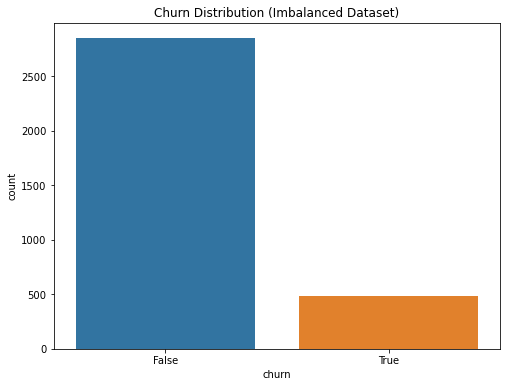

Churn rate: 14.5%


In [76]:
# Target distribution (Churn column)
plt.figure(figsize=(8,6))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution (Imbalanced Dataset)')
plt.show()

print(f"Churn rate: {df.churn.mean():.1%}")

**Initial Observations:**

1. No missing values

2. High class imbalance (14.5% churn rate)

3. Phone number and area code may not be useful predictors

### Correlation with Churn